In [87]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
df=df.drop("customerID",axis=1)

In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [92]:
pd.to_numeric(df["TotalCharges"],errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [93]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [94]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [95]:
df1=df[df.TotalCharges!=" "]

In [96]:
df1.iloc[488].TotalCharges

'74.35'

In [97]:
df1["TotalCharges"].isnull().sum()

0

In [98]:
df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])

C:\Users\Naveen\AppData\Local\Temp\ipykernel_24856\1161862034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"])


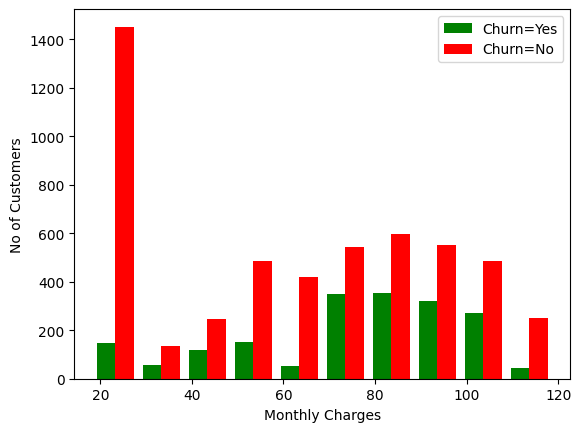

In [99]:
mc_churn_no=df1[df1["Churn"]=="No"].MonthlyCharges
mc_churn_yes=df1[df1["Churn"]=="Yes"].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("No of Customers")
plt.hist([mc_churn_yes,mc_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()

In [100]:
def show_df_unique(df):
    for col in df:
        if df[col].dtypes=="object":
            print(col,df[col].unique())

In [101]:
show_df_unique(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [102]:
df1[df1["MultipleLines"]=="No phone service"].MultipleLines="No"

C:\Users\Naveen\AppData\Local\Temp\ipykernel_24856\1487029042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1["MultipleLines"]=="No phone service"].MultipleLines="No"


In [103]:
df1=df1.replace("No internet service","No")

In [104]:
df1=df1.replace("No phone service","No")

In [105]:
df1[df1["MultipleLines"]=="No phone service"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [106]:
show_df_unique(df1)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [107]:
yes_no_columns="Partner Dependents PhoneService MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies PaperlessBilling Churn".split()
print(yes_no_columns)
for col in yes_no_columns:
    print(df[col])
    df1[col].replace({"Yes": 1,"No": 0},inplace=True)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object
0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
N

In [108]:
for col in df1:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [109]:
show_df_unique(df1)

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [110]:
show_df_unique(df2)

In [111]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

In [112]:
df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [113]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
df2[cols_to_scale]=MinMaxScaler().fit_transform(df2[cols_to_scale])

In [114]:
x=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

In [116]:
len(x)

7032

In [117]:
len(x_train),len(x_test)

(5274, 1758)

In [118]:
5274/7032

0.75

In [119]:
len(x_train.columns)

26

## First layer is ip layer and it is Dense layer
We have to set no of columns=no of neurons

In [120]:
tensorflow.compat.v1.train.Optimizer

tensorflow.python.training.optimizer.Optimizer

In [121]:
x_train = tensorflow.convert_to_tensor(x_train, dtype=tensorflow.float32)
y_train = tensorflow.convert_to_tensor(y_train, dtype=tensorflow.float32)
x_test = tensorflow.convert_to_tensor(x_test, dtype=tensorflow.float32)
y_test = tensorflow.convert_to_tensor(y_test, dtype=tensorflow.float32)

In [122]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7727
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7960
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.7990
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8017
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8041
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8041
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8068
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8043
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8036
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4083 - accura

165/165 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8252
Epoch 82/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8275
Epoch 83/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8282
Epoch 84/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8261
Epoch 85/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8303
Epoch 86/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8275
Epoch 87/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8256
Epoch 88/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8297
Epoch 89/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8269
Epoch 90/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 

In [123]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7696


[0.48271819949150085, 0.7696245908737183]

In [124]:
y_predicted=model.predict(x_test)

55/55 [==============================] - 0s 1ms/step


In [125]:
y_predicted[:5]

array([[0.12423152],
       [0.6679544 ],
       [0.00832998],
       [0.81282544],
       [0.3602859 ]], dtype=float32)

In [126]:
y_test[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 1., 1.], dtype=float32)>

In [127]:
y_predicted_final=[1 if i>0.5 else 0 for i in y_predicted]

In [130]:
y_predicted_final[:4]

[0, 1, 0, 1]

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_final))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1267
         1.0       0.59      0.58      0.59       491

    accuracy                           0.77      1758
   macro avg       0.71      0.71      0.71      1758
weighted avg       0.77      0.77      0.77      1758



## Handling imbalanced dataset

In [132]:
class_count_0,class_count_1=df1.Churn.value_counts()
class_count_0,class_count_1

(5163, 1869)

In [133]:
df_cls_0=df2[df2["Churn"]==0]
df_cls_1=df2[df2["Churn"]==1]
df_cls_0.shape
df_cls_1.shape

(1869, 27)

In [134]:
df_0_under=df_cls_0.sample(class_count_1)
df_under=pd.concat([df_0_under,df_cls_1],axis=0)
df_under.shape

(3738, 27)

In [135]:
new_class_count_0,new_class_count_1=df_under["Churn"].value_counts()
new_class_count_0,new_class_count_1

(1869, 1869)

In [136]:
X=df_under.drop("Churn",axis=1)
Y=df_under["Churn"]

In [137]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=5,stratify=Y)

In [138]:
X_train = tensorflow.convert_to_tensor(X_train, dtype=tensorflow.float32)
Y_train = tensorflow.convert_to_tensor(Y_train, dtype=tensorflow.float32)
X_test = tensorflow.convert_to_tensor(X_test, dtype=tensorflow.float32)
Y_test = tensorflow.convert_to_tensor(Y_test, dtype=tensorflow.float32)

In [139]:
def ANN(x_train,x_test,y_train,y_test,loss,weights):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam",loss=loss,metrics=["accuracy"])
    if weights==-1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weights=weights)
    y_preds=model.predict(x_test)
    y_preds=np.round(y_preds)
    print(model.evaluate(x_test,y_test))
    y_predicted_final=[1 if i>0.5 else 0 for i in y_preds]
    print(classification_report(y_test,y_predicted_final))
    
    return y_preds

In [140]:
y_preds=ANN(X_train,X_test,Y_train,Y_test,"binary_crossentropy",-1)


Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.6957
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7488
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7528
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7563
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7617
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7653
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7649
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7645
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7610
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7699
Epoch 11/

88/88 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8009
Epoch 84/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8081
Epoch 85/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8077
Epoch 86/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8077
Epoch 87/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8088
Epoch 88/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8063
Epoch 89/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8127
Epoch 90/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8109
Epoch 91/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8141
Epoch 92/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8116
Epoch 93/100


## Now let us try it using Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
model_ls=LogisticRegression()


In [144]:
model_ls.fit(X_train,Y_train)

LogisticRegression()

In [145]:
print(model_ls.score(X_test,Y_test))

0.7764705882352941


In [149]:
y_preds_ls=model_ls.predict(X_test)
len(y_preds_ls),len(Y_test)

(935, 935)

In [151]:
len(X_test)

935

In [148]:
print(classification_report(Y_test,y_preds_ls))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       467
         1.0       0.76      0.81      0.78       468

    accuracy                           0.78       935
   macro avg       0.78      0.78      0.78       935
weighted avg       0.78      0.78      0.78       935

